In [1]:
import ROOT
import numpy as np
import os
import time
c1 = ROOT.TCanvas()
ROOT.gSystem.Load("/home/vasu/quadis/build/lib/libquadis.so")

Welcome to JupyROOT 6.22/02


0

In [2]:
infile = ROOT.TFile("/home/vasu/PPC/PPC_SigGen/CleanNoisyPulses/parallel_output/600kev/data35_sim1530to1574.root")
tree = infile.Get("T1")
nevent = ROOT.NEvent()
tree.SetBranchAddress("NEvent",nevent)
tree.GetEntry(35000)
npulse = nevent.GetPulse(0) 


fitter = ROOT.NAPulseFitter("/home/vasu/PPC/PPC_SigGen/SignalLib_root/new_OutputRZperfect.root","T1","NEvent",1)

baselines = 1000
taus = 7100
rises=700
gaps=225
pulse = fitter.GetPreProcessedPulse(npulse, False, baselines, taus, rises, gaps)

fitter.SetLibPulseMinThreshold(0.01)
fitter.SetLibPulseMaxThreshold(0.75)
fitter.SetShiftWindow(5) 
fitter.FitPulse(pulse)
fitter.PrintBestFit()
#fitter.PrintFitResult(1

Loaded library tree with 1724 entries
Best fit index: 889 with chi-square: 0.847445 NDOF: 103 shifted: 1008 start data sample: 2034 and prob: 1


In [3]:
chis = fitter.GetChis()
R = np.zeros(len(chis))
Z = np.zeros(len(chis))
for k in range (len(chis)):
    if (fitter.GetLibPulseData(k).GetParameterByName("R")>-1):
        R[k] = fitter.GetLibPulseData(k).GetParameterByName("R")
        Z[k] = fitter.GetLibPulseData(k).GetParameterByName("Z")
    else:
        continue

In [4]:
chi = np.array(chis)

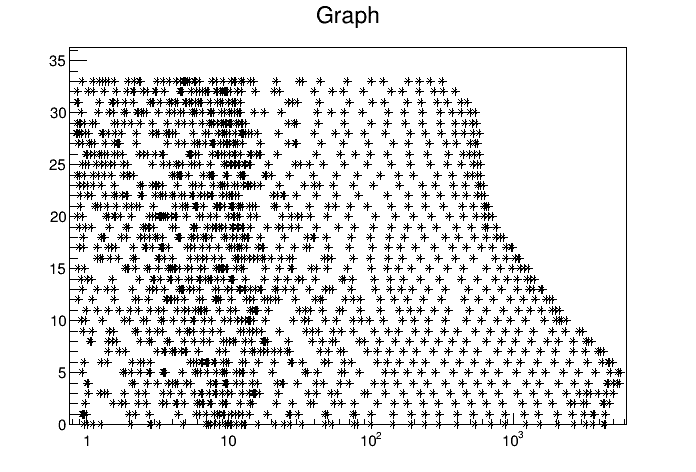

In [5]:
g = ROOT.TGraph(len(chis),chi,R)
g.Draw('A*')
c1.SetLogx()
# c1.SetLogy()
c1.Draw()

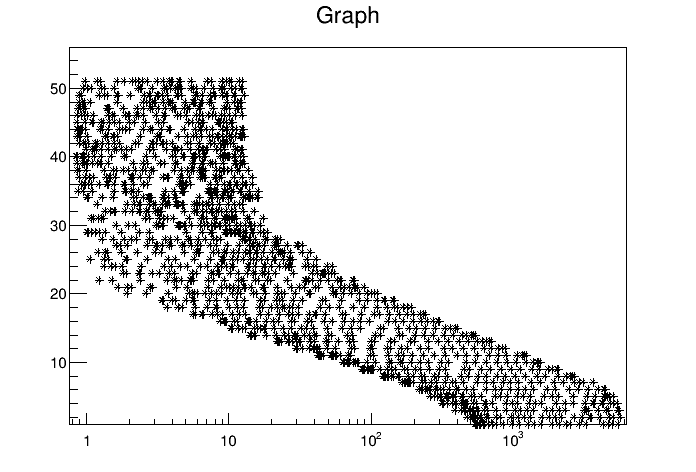

In [6]:
g = ROOT.TGraph(len(chis),chi,Z)
g.Draw('A*')
c1.SetLogx()
# c1.SetLogy()
c1.Draw()

In [7]:
# g = ROOT.TGraph(len(chis),R,Z)
# g.Draw('A*')
# c1.Draw()